<a href="https://colab.research.google.com/github/Taeichang/DataAnalysis/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 7강 - 데이터 전처리 2

## 4.3 Pandas를 이용한 데이터 정제

### 4.3.1 결측치 찾기

* 결측치는 데이터에 값이 존재하지 않을 경우를 의미
* Pandas에서는 주로 NaN(Not a Number)로 표현, NumPy에 포함

#### insull()과 insa() 메서드를 사용한 결측치 확인

> isnull() - 각 요소가 결측치인지 여부를 나타내는 불리언 DataFrame 반환

> isna() - isnull()과 동일한 기능 수행

> sum() - 각 열의 결측치 개수 계산, 어떤 열에 집중되어 있는지 빠르게 확인

> sum(axis=1) 매개변수 - 행별 결측치 개수

> any() - isnull() 메서드와 함께 사용함, 데이터셋 결측치 존재 여부를 불리언 값으로 확인, 하라나도 존재 시 True, 모두 채워져 있을 경우 False

> df[df.isnull().any(axis=1) - 하나 이상의 결측지를 포함한 행만 쉽게 추출

> notnull() - insull() 반대의 결과, 값이 존재하는 항목 확인

> DataFrame의 shape 속성을 사용하여 전체 데이터 요소의 수 계산, 결측치 차지 비율 백분율로 표시

In [6]:
import pandas as pd
import numpy as np

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

# 결측치 여부 확인
print('\n1. 결측치 여부 확인 (isnull):\n', df.isnull())
print('\n2. 결측치 여부 확인 (isna):\n', df.isna())

# 열별, 행별 결측치 개수 확인
print('\n3. 열별 결측치 개수:\n', df.isnull().sum())
print('\n4. 행별 결측치 개수:\n', df.isnull().sum(axis = 1)) # 축의 방향을 바꿔서 가로로 처리

# 특정 열, 행 결측치 확인
print('\n5. 결측치가 있는 행:\n', df[df.isnull().any(axis = 1)]) #가로로 묶음. .any는 0 초과
print('\n6. 나이에 결측치가 있는 행:\n', df[df['나이'].isnull()])

# 결측치가 아닌 항목 확인
print('\n7. 결측치가 아닌 항목 확인 (notnull):\n', df.notnull())

# 결측치 비율
# null 값 개수 (특정 칼럼 + 전체 칼럼) / 전체 데이터 항목 개수 (가로 * 세로)
missing_percentage = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
print(f'\n8. 전체 데이터 중 결측치 비율: {missing_percentage:.2f}%')


1. 결측치 여부 확인 (isnull):
       이름     나이     도시     점수
0  False  False  False  False
1  False  False   True  False
2  False   True  False   True
3  False  False  False  False
4  False  False  False  False

2. 결측치 여부 확인 (isna):
       이름     나이     도시     점수
0  False  False  False  False
1  False  False   True  False
2  False   True  False   True
3  False  False  False  False
4  False  False  False  False

3. 열별 결측치 개수:
 이름    0
나이    1
도시    1
점수    1
dtype: int64

4. 행별 결측치 개수:
 0    0
1    1
2    2
3    0
4    0
dtype: int64

5. 결측치가 있는 행:
     이름    나이    도시    점수
1  이영희  30.0  None  85.0
2  박민수   NaN    인천   NaN

6. 나이에 결측치가 있는 행:
     이름  나이  도시  점수
2  박민수 NaN  인천 NaN

7. 결측치가 아닌 항목 확인 (notnull):
      이름     나이     도시     점수
0  True   True   True   True
1  True   True  False   True
2  True  False   True  False
3  True   True   True   True
4  True   True   True   True

8. 전체 데이터 중 결측치 비율: 15.00%


#### 시각화 도구를 활용한 결측치 패턴 파악  

> Seaborn의 heatmap() - 결측치의 분포를 직관적으로 표현, 어떤 패턴으로 발생하는지 파악


> missingno의 matrix() - 결측치 패턴을 시각화, 데이터 누락 여부를 행렬로 표현


* sns.heatmap(df.isnull()) 통해 df의 결측치 여부를 색상으로 표현

In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,872 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

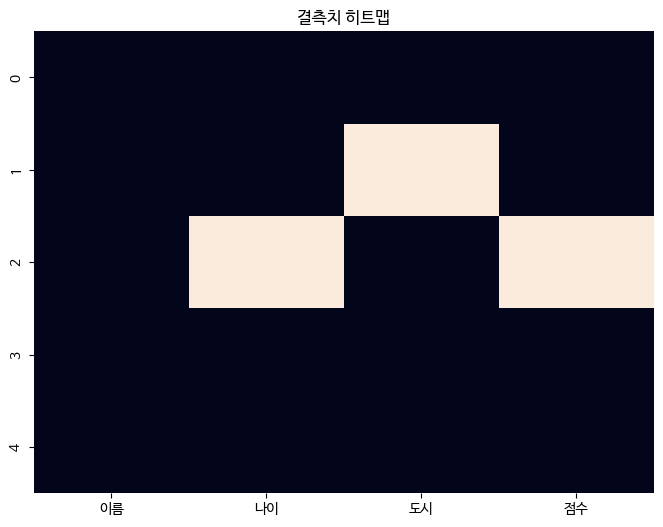

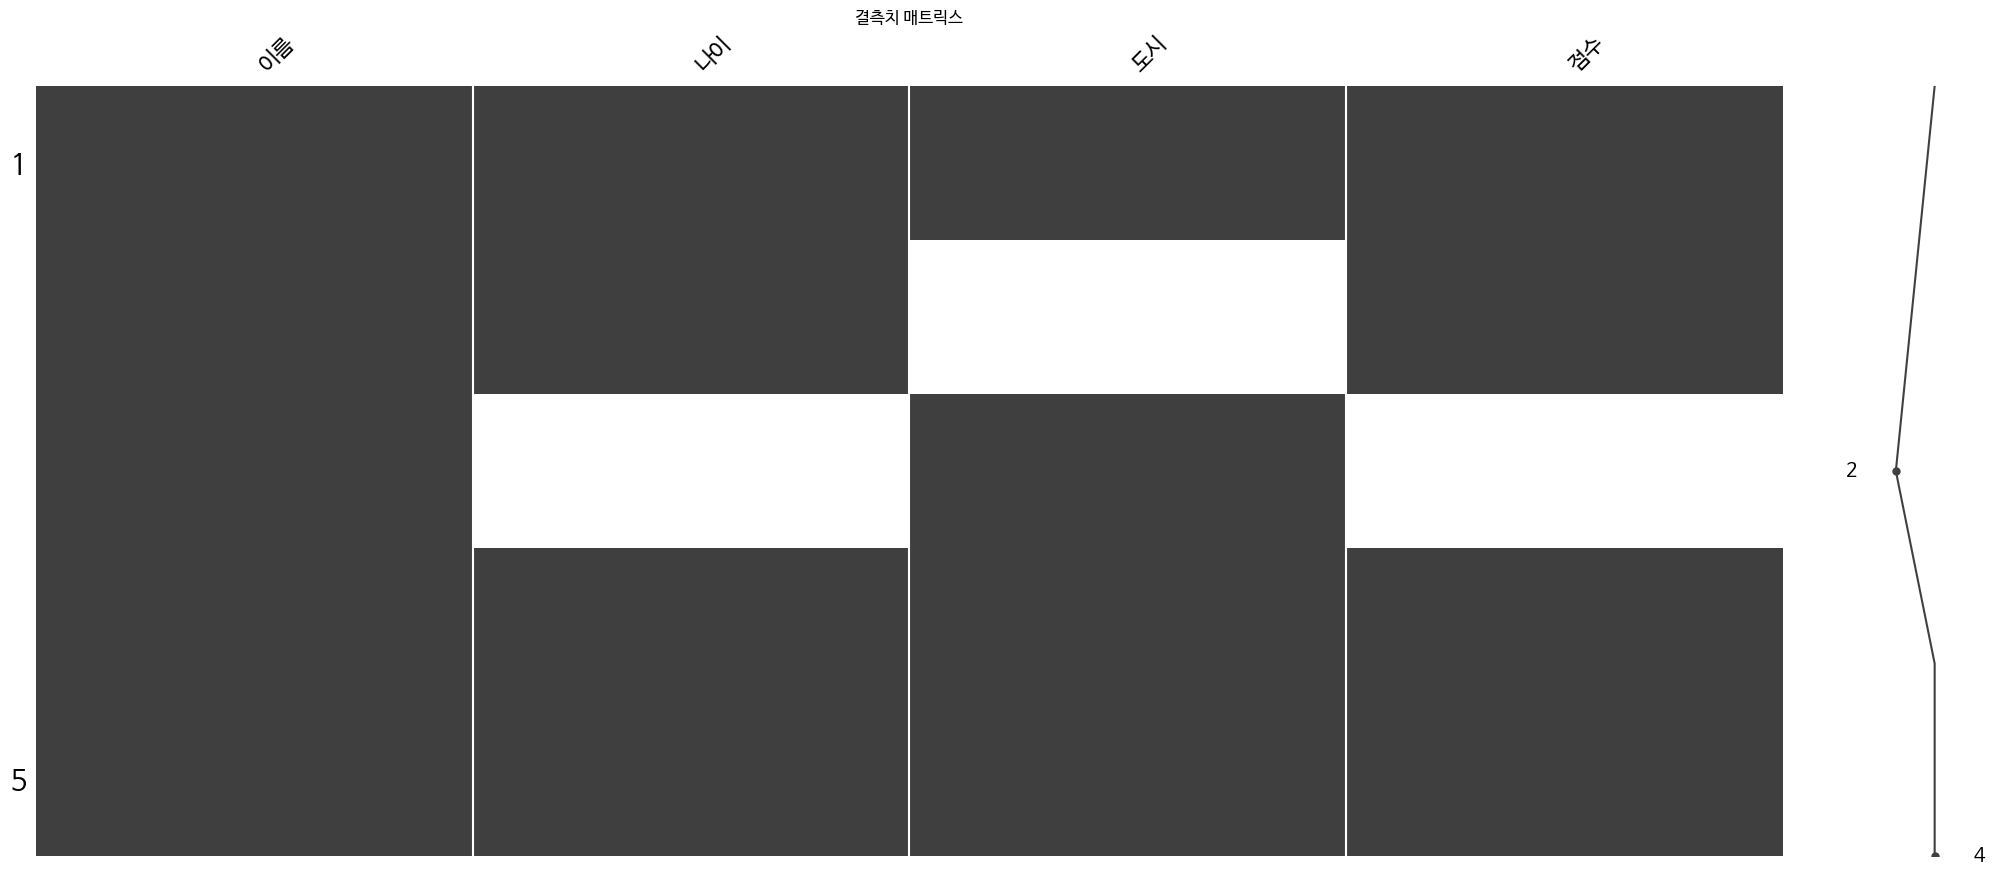

In [3]:
import numpy as np
import pandas as pd

# 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

# 결측치 히트맵
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cbar = False)
plt.title("결측치 히트맵")
plt.show()

# 결측치 매트릭스
msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

### 4.3.2 이상치 찾기

* 이상치는 데이터의 일반적인 범위를 벗어난 특이난 값을 의미
* 통계적 방법과 시각적 방법이 있음

#### 사분위 범위를 통한 이상치 찾기

* IQR(사분위 범위) 데이터를 크기 순으로 정렬했을 때, 가운데 50%에 해당하는 범위를 계산, 이 범위를 벗어나는 데이터를 이상치로 간주
* IQR은 구체적으로 데이터의 25% 지점(Q1)과 75% 지점(Q3) 사이의 거리
* 비정규 또는 이상치가 많은 데이터에 적합

> quantile() - Q1과 Q3 값을 쉽게 계산

In [4]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

# 사분위 범위 경계값 계산
q1 = df['점수'].quantile(0.25)
q3 = df['점수'].quantile(0.75)
iqr = q3 - q1
하한값 = q1 - 1.5 * iqr
상한값 = q3 + 1.5 * iqr

# IQR 통계량 출력
print('IQR 통계량:')
print(f'Q1 (25% 지점): {q1:.2f}')
print(f'Q3 (75% 지점): {q3:.2f}')
print(f'IQR (Q3 - Q1): {iqr:.2f}')
print(f'하한 경계값 (Q1 - 1.5 * IQR): {하한값:.2f}')
print(f'상한 경계값 (Q3 + 1.5 * IQR): {상한값:.2f}')

IQR 통계량:
Q1 (25% 지점): 63.25
Q3 (75% 지점): 85.00
IQR (Q3 - Q1): 21.75
하한 경계값 (Q1 - 1.5 * IQR): 30.62
상한 경계값 (Q3 + 1.5 * IQR): 117.62


#### Z-score를 활용한 이상치 탐지
* 정규분포를 가정하고 각 데이터가 평균으로부터 얼마나 떨어져 있는지를 표준편차 단위로 특정
* 정규분포에서 강력, 평균/표준편차에 민감
* Z-score의 절댓값이 특정 임계값을 초과하는 경우, 해당 데이터 포인트를 이상치로 판단

In [5]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

# Z-점수 계산
점수_평균 = df['점수'].mean()
점수_표준편차 = df['점수'].std()
df['점수_Z'] = (df['점수'] - 점수_평균) / 점수_표준편차

# 임계값 설정 및 이상치 여부 판단
임계값 = 2
df['이상치여부'] = df['점수_Z'].abs( ) > 임계값 # .abs() 절대값으로 해야함

# 이상치 데이터 출력
print('학생 성적 Z-score 분석 결과:')
print('=' * 50)
print(df)
print('\n이상치로 판별된 데이터:')
print(df[df['이상치여부'] == True])

# 이상치 비율 출력
# 불리언이라 1/0, 평균을 내면 비율 구할 수 있음
이상치_비율 = df['이상치여부'].mean( ) * 100
print(f'\n이상치 비율: {이상치_비율:.2f}%')

학생 성적 Z-score 분석 결과:
      학번   점수      점수_Z  이상치여부
0   1001   72 -0.034475  False
1   1002   68 -0.089635  False
2   1003   75  0.006895  False
3   1004  282  2.861411   True
4   1005   64 -0.144794  False
5   1006   31 -0.599862  False
6   1007   78  0.048265  False
7   1008   69 -0.075845  False
8   1009   88  0.186164  False
9   1010   92  0.241324  False
10  1011   22 -0.723972  False
11  1012   84  0.131004  False
12  1013   61 -0.186164  False
13  1014  -90 -2.268444   True
14  1015  130  0.765341  False
15  1016   66 -0.117214  False

이상치로 판별된 데이터:
      학번   점수      점수_Z  이상치여부
3   1004  282  2.861411   True
13  1014  -90 -2.268444   True

이상치 비율: 12.50%


## 4.4 Pandas를 이용한 데이터 문제 해결

### 4.4.1 데이터 문제 해결

* 제거(removal) 전략
    * 결측치나 이상치를 포함하는 행/열을 데이터셋에서 완전히 제거
    * dropna()
    * 정보의 손실 가능성으로, 규모가 작거나 결측치가 특정 채턴을 가지고 있는 경우 사용에 신중
* 대치(imputation) 전략
    * 결측치나 이상치를 적절한 값으로 대체 p.175 <표 확인>
    * 데이터 손실 최소화
    * 하나의 고정된 값으로 바꿔줌
* 보간(interpolation) 전략
    * 주변 데이터 포인트 관계를 이용하여 결측치 추정. 시계열 데이터, 공간 데이터 같이 포인트 간에 논리적인 연속성 있을 시 효과적 p.175-176 <표 확인>
    * 상황에 따라 다른 열의 값을 가지고 추정


#### 평균값 및 선형보간법을 통한 결측치 처리
 * isnull().sum() - 각 열에 있는 결측치 개수 확인
 * dropna() - 너무 많은 정보가 누락된 행 제거
 * thresh=df.shape[1]-1 - 전체 열 개수에서 1을 뺀 만큼의 값이 존재하는 행만 유지
 * interpolate(method='linear') - 해당 열의 다른 데이터 값 사이 관계를 이용해 결측치 추정

In [9]:
import pandas as pd
import numpy as np

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
print(df.isnull().sum())

df_cleaned = df.dropna(thresh=df.shape[1] - 1)

# 나이, 소득 평균값 대치 및 결과 출력
df_cleaned.loc[:, ['나이', '소득']] = df_cleaned[['나이', '소득']].fillna(df_cleaned[['나이', '소득']].mean())
print(df_cleaned[['나이', '소득']].isnull().sum())

# 지출, 평균구매횟수 선형보간법 적용
df_cleaned.loc[:, ['지출', '평균구매횟수']] = df_cleaned[['지출', '평균구매횟수']].interpolate(method = 'linear')
print(df_cleaned[['지출', '평균구매횟수']].isnull().sum())

df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")

ID         0
나이        50
소득        50
지출        50
평균구매횟수    50
dtype: int64
나이    0
소득    0
dtype: int64
지출        0
평균구매횟수    0
dtype: int64


### 4.4.2 Pandas 데이터 값 변경

#### replace(), map(), apply(), loc인덱서, where() 메서드 데이터 값 변경 <기능 알아두기>

In [20]:
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)

# replace를 이용한 Seoul -> 서울
df['city'] = df['city'].replace('Seoul','서울')
print('\nSeoul을 서울로 바꾼 city열:\n', df['city'])
print("\n", "-" * 100)

# replace를 이용한 None -> 미정, Incheon -> 인천
df['city'] = df['city'].replace({None:'미정', 'Incheon':'인천'})
print('\n여러 개의 값을 바꾼 city열:\n', df['city'])
print("\n", "-" * 100)

# map을 이용한 값 변경, 딕셔너리/함수 사용 가능
df = pd.DataFrame(data)
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}
df['city'] = df['city'].map(city_map)
print('\nmap 함수를 이용한 값 변경:\n', df['city'])
print("\n", "-" * 100)

df['age_str'] = df['age'].map(lambda x: f'{x}살' if pd.notna(x) else '알 수 없음')
print('\nmap 함수를 이용한 age 변경:\n', df['age_str'])
print("\n", "-" * 100)

# apply 함수를 이용한 값 변경, 함수명을 적용해서 특정 컬럼 값을 변경 및 저장
df['age_apply'] = df['age'].apply(lambda x: x+2 if pd.notna(x) else None)
print('\napply 함수를 이용한 값 변경:\n', df)
print("\n", "-" * 100)

# apply 함수를 이용한 행단위 값 변경
def age_plus_score(row):
    age = row['age'] if pd.notna(row['age']) else 0
    score= row['score'] if pd.notna(row['score']) else 0
    return age + score
df['age_plus_score'] = df.apply(age_plus_score, axis = 1)
print('\napply 함수를 이용한 행단위 값 변경:\n', df)
print("\n", "-" * 100)

# loc 인덱스를 이용한 값 변경, 불리언 인덱스 이용하여 특정 인덱스 가져옴
df.loc[df['score'] < 90, 'score'] = 90
print('\n점수가 90점 미만인 사람 90점으로 변경:\n', df)
print("\n", "-" * 100)

# where 함수를 이용한 값 변경, 조건에 맞는 것만 갖고 옴
df['age_where'] = df['age'].where(df['age'] >= 30, other = 0)
print('\nage가 30 이상인 값만 유지하고 나머지를 0으로 변경:\n', df['age_where'])



Seoul을 서울로 바꾼 city열:
 0         서울
1       None
2    Incheon
3         서울
4    Daejeon
Name: city, dtype: object

 ----------------------------------------------------------------------------------------------------

여러 개의 값을 바꾼 city열:
 0         서울
1         미정
2         인천
3         서울
4    Daejeon
Name: city, dtype: object

 ----------------------------------------------------------------------------------------------------

map 함수를 이용한 값 변경:
 0    서울특별시
1       미정
2    인천광역시
3    서울특별시
4    대전광역시
Name: city, dtype: object

 ----------------------------------------------------------------------------------------------------

map 함수를 이용한 age 변경:
 0     25.0살
1     30.0살
2    알 수 없음
3     22.0살
4     35.0살
Name: age_str, dtype: object

 ----------------------------------------------------------------------------------------------------

apply 함수를 이용한 값 변경:
     age   city  score age_str  age_apply
0  25.0  서울특별시   90.0   25.0살       27.0
1  30.0     미정   85.0   30.0살       32.0
2   N

### 4.4.3 날짜 데이터 다루기

#### datetime 데이터 타입 변환, dt 접근자를 통한 날짜 정보 추출, 날짜 데이터 변경하는 예


In [21]:
date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})

# datetime 타입 변환
df_date['date'] = pd.to_datetime(df_date['date_str'])
print('\ndatetime 타입으로 변환된 데이터:\n', df_date)
print('\ndatetime 타입:\n', df_date['date'].dtype)
print("\n", "-" * 100)

# 날짜 데이터 분리
df_date['year'] = df_date['date'].dt.year
df_date['month'] = df_date['date'].dt.month
df_date['day'] = df_date['date'].dt.day
df_date['weekday'] = df_date['date'].dt.day_name()
print('\n날짜 데이터 분리:\n', df_date)
print("\n", "-" * 100)

# 날짜 데이터 포멧 변경
df_date['date_formatted'] = df_date['date'].dt.strftime('%Y/%m/%d')
print('\n날짜 데이터 포맷 변경(%Y/%m/%d):\n', df_date)
print("\n", "-" * 100)

df_date['date_ymd'] = df_date['date'].dt.strftime('%Y년 %m월 %일')
df_date['date_dmy'] = df_date['date'].dt.strftime('%d-%m-%Y')
df_date['date_weekday'] = df_date['date'].dt.strftime('%A, %Y-%m-%d')
print('\n다양한 형식의 날짜 포맷:\n', df_date)



datetime 타입으로 변환된 데이터:
      date_str       date
0  2025-07-01 2025-07-01
1  2025-08-01 2025-08-01
2  2025-09-01 2025-09-01

datetime 타입:
 datetime64[ns]

 ----------------------------------------------------------------------------------------------------

날짜 데이터 분리:
      date_str       date  year  month  day  weekday
0  2025-07-01 2025-07-01  2025      7    1  Tuesday
1  2025-08-01 2025-08-01  2025      8    1   Friday
2  2025-09-01 2025-09-01  2025      9    1   Monday

 ----------------------------------------------------------------------------------------------------

날짜 데이터 포맷 변경(%Y/%m/%d):
      date_str       date  year  month  day  weekday date_formatted
0  2025-07-01 2025-07-01  2025      7    1  Tuesday     2025/07/01
1  2025-08-01 2025-08-01  2025      8    1   Friday     2025/08/01
2  2025-09-01 2025-09-01  2025      9    1   Monday     2025/09/01

 ----------------------------------------------------------------------------------------------------

다양한 형식의 날짜 포맷:
     

## 4.5 개념정리 실습 (6강 마지막 부분부터)

### Kaggle을 활용한 데이터 수집 및 측정

#### Kaggle API 키 업로드

- Kaggle([https://www.kaggle.com](https://www.kaggle.com)) 회원 가입
- Kaggle 접근 토큰 생성(API 키)


In [22]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"taeichang","key":"b879aaad82fe16758f84a08dc8d9eb49"}'}

#### Kaggle API 키 사용을 위한 Colab 환경 설정

In [23]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#### Kaggle 데이터셋 다운로드

In [26]:
!kaggle competitions download -c store-sales-time-series-forecasting

!unzip store-sales-time-series-forecasting.zip

  0% 0.00/21.4M [00:00<?, ?B/s]
100% 21.4M/21.4M [00:00<00:00, 1.18GB/s]
Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


#### Kaggle 데이터셋 DataFrame 로드 및 살펴보기

In [27]:
import pandas as pd

# Grocery Sales 데이터 DataFrame 로드
train =  pd.read_csv('train.csv')
stores =  pd.read_csv('stores.csv')
transactions =  pd.read_csv('transactions.csv')
oil =  pd.read_csv('oil.csv')
holidays_events =  pd.read_csv('holidays_events.csv')

# 판매 데이터 살펴보기
print('학습 데이터 기본 정보:')
print(train.info())

학습 데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None


#### Kaggle 데이터셋 측정

In [28]:
# 판매 데이터 기본 통계량
print('판매 데이터 기본 통계량:')
print(train.describe())

# 매장 데이터 기본 정보
print('\n매장 데이터 기본 정보:')
print(stores.head())

# 원유 가격 데이터 기본 정보
print('\n원유 가격 데이터 기본 정보:')
print(oil.head())

판매 데이터 기본 통계량:
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

매장 데이터 기본 정보:
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo

#### 데이터 분포 시각화

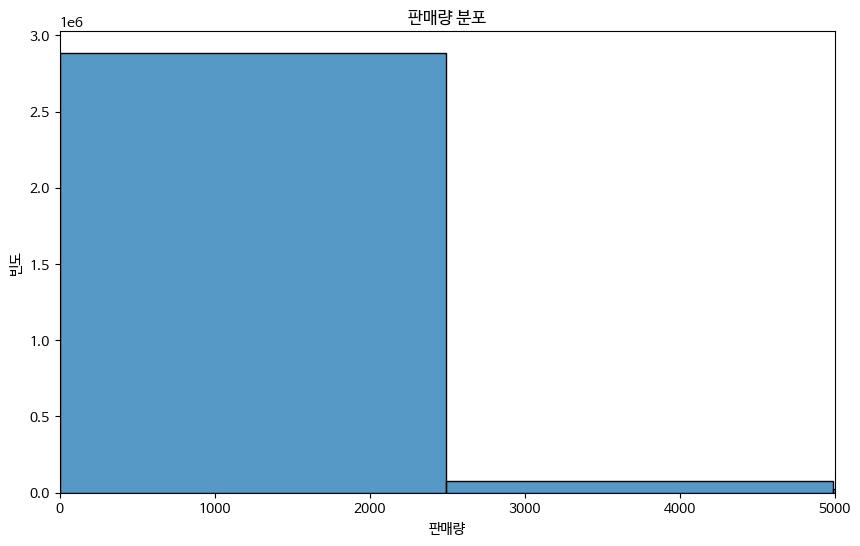

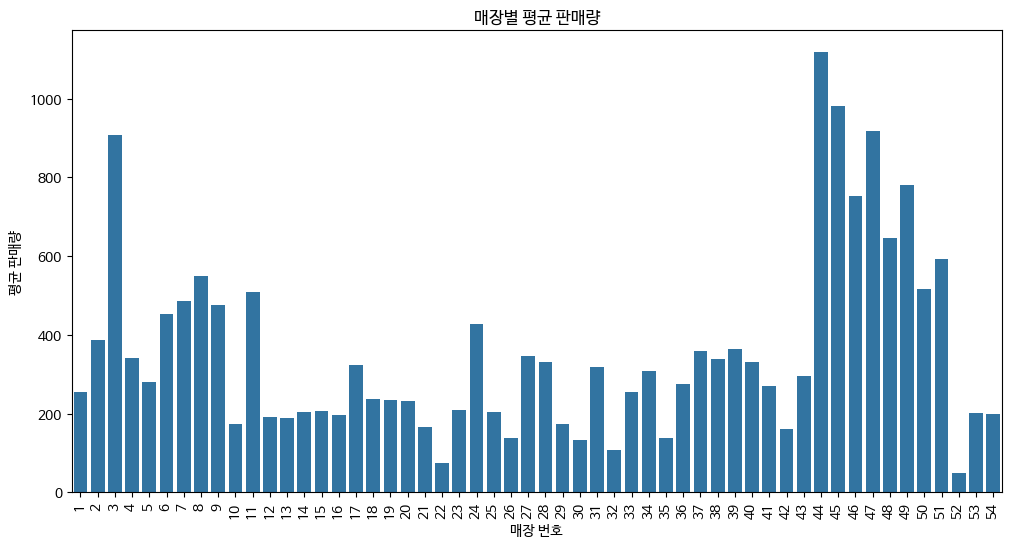

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

#### 결측치 처리

In [30]:
# 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치
print('훈련 데이터 결측치:')
print(train.isnull().sum())

print('\n매장 데이터 결측치:')
print(stores.isnull().sum())

print('\n거래 데이터 결측치:')
print(transactions.isnull().sum())

print('\n원유 데이터 결측치:')
print(oil.isnull().sum())

print('\n휴일 데이터 결측치:')
print(holidays_events.isnull().sum())

훈련 데이터 결측치:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

매장 데이터 결측치:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

거래 데이터 결측치:
date            0
store_nbr       0
transactions    0
dtype: int64

원유 데이터 결측치:
date           0
dcoilwtico    43
dtype: int64

휴일 데이터 결측치:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


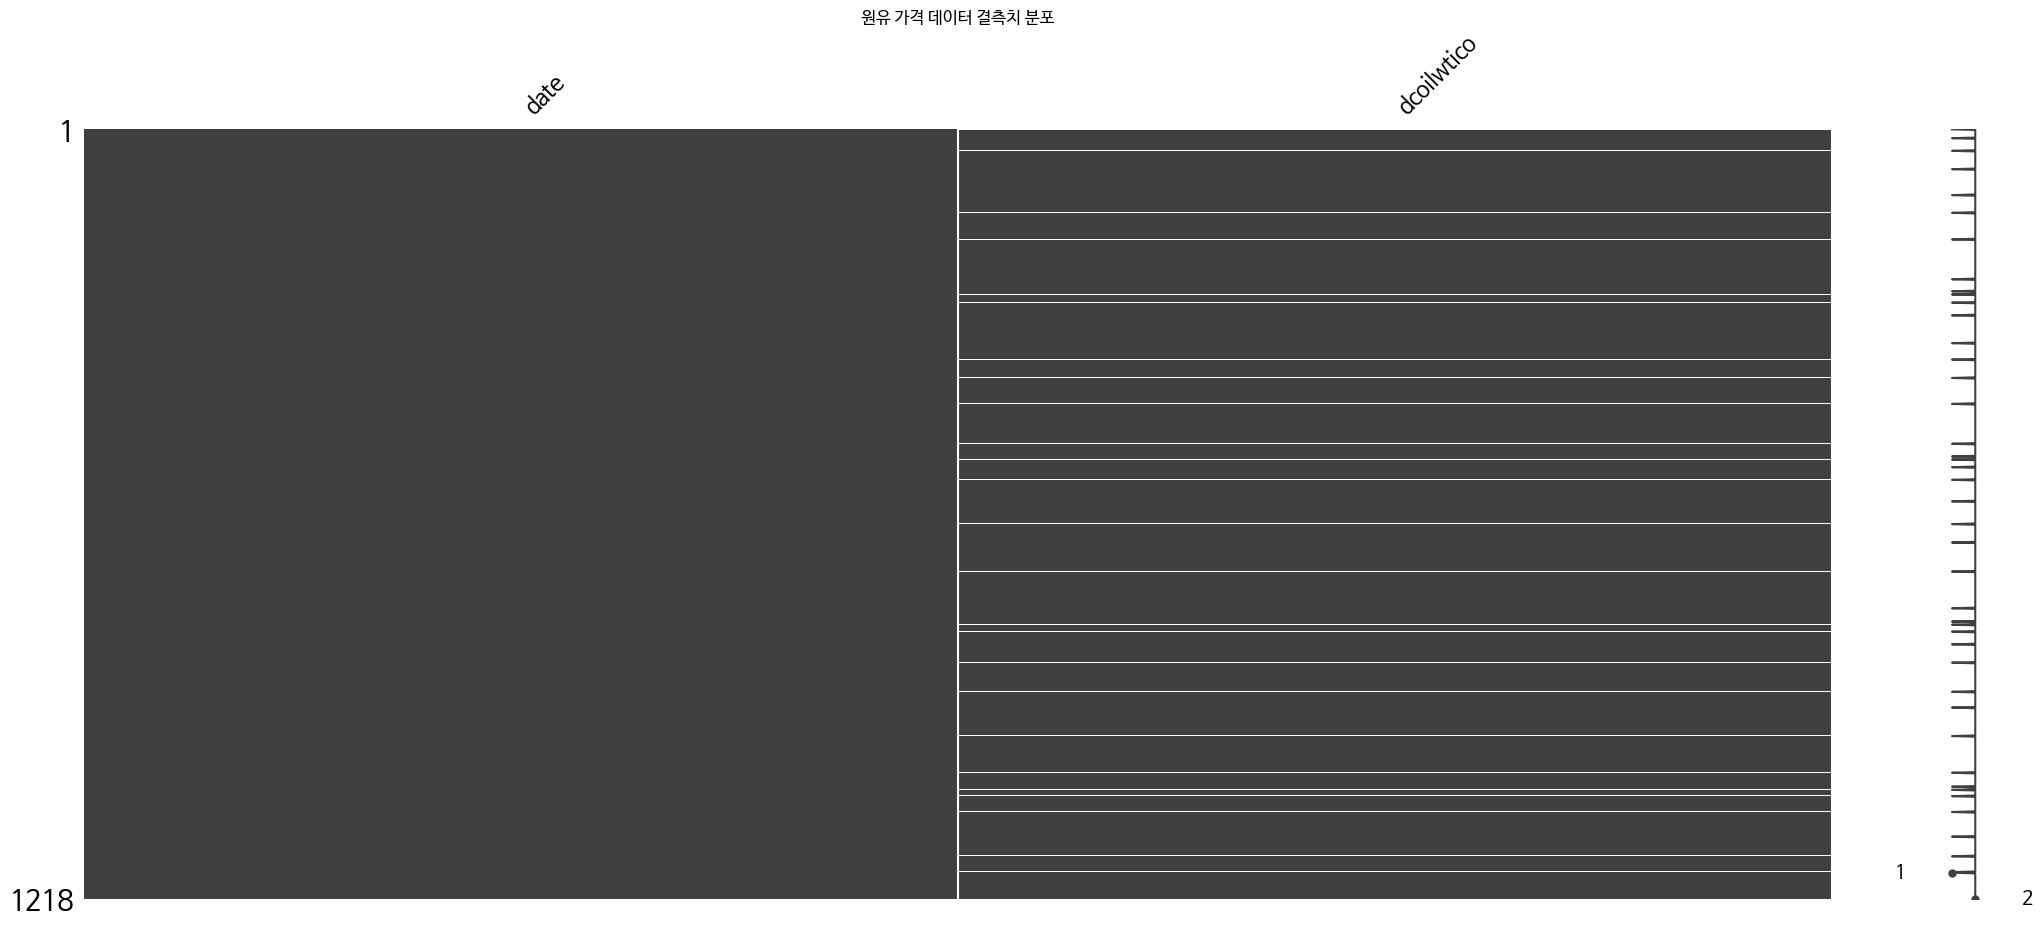

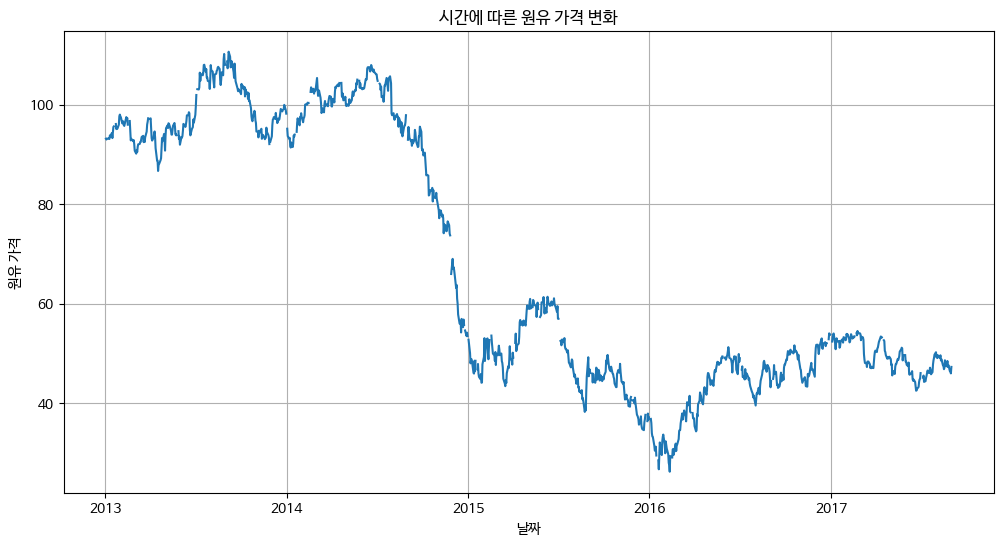

In [31]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()


원유 가격 데이터 결측치 처리 전후:
처리 전 결측치 개수: 43
처리 후 결측치 개수: 0


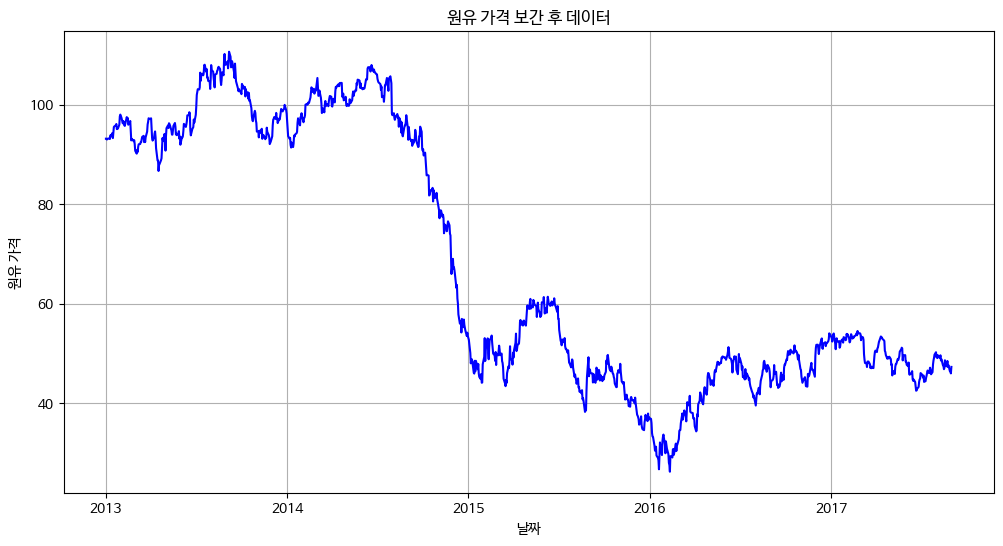

In [33]:
oil_cleaned = oil.copy()
oil_cleaned['dcoilwtico'] = oil_cleaned['dcoilwtico'].interpolate(method = 'linear', limit_direction = 'both')

# 선형 보간법 적용한 원유 가격 데이터
print('\n원유 가격 데이터 결측치 처리 전후:')
print('처리 전 결측치 개수:', oil['dcoilwtico'].isnull().sum())
print('처리 후 결측치 개수:', oil_cleaned['dcoilwtico'].isnull().sum())

plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

#### 이상치 처리

이상치 개수: 186,641건
전체 대비 비율: 6.22%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


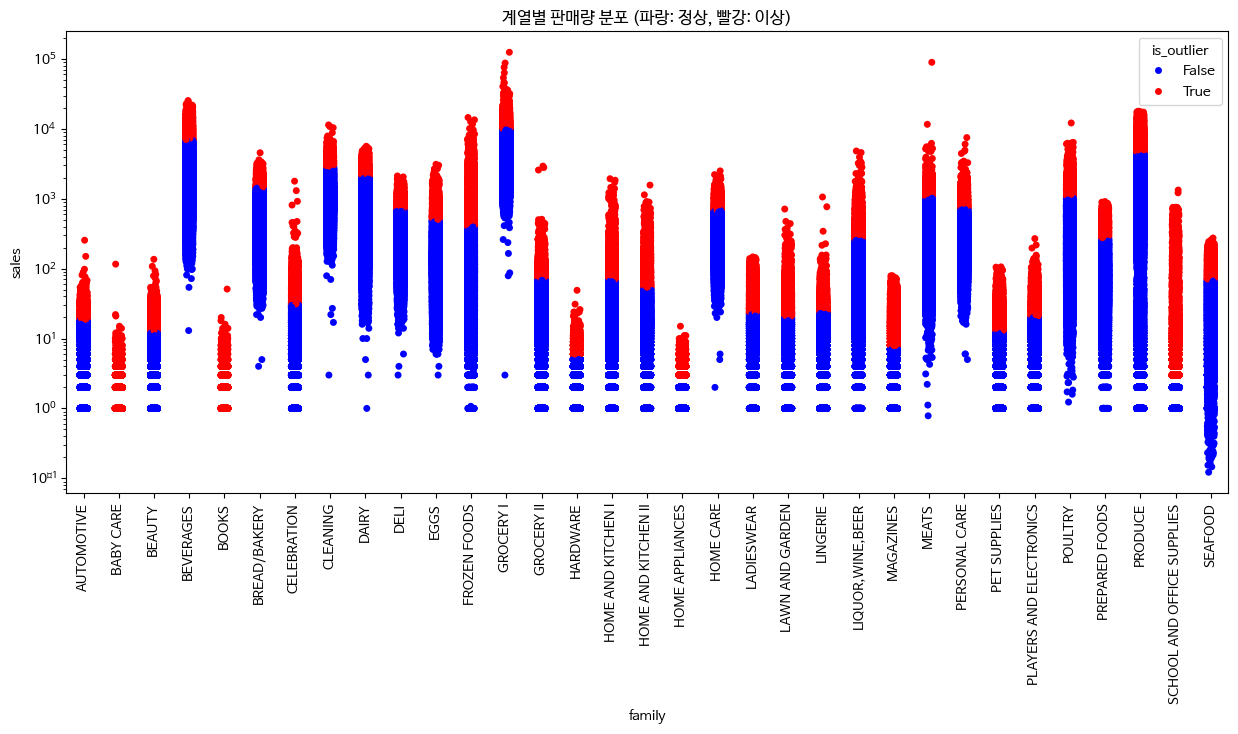

In [38]:
# 제품 계열별 판매 데이터 IQR 계산
family_bounds = train.groupby('family')['sales'].apply(
    lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75)) - x.quantile(0.25)
    )

# 상한값 초과 판매량 이상치 분류
train_enhanced = train.copy()
train_enhanced['upper_bound'] = train_enhanced['family'].map(family_bounds)
train_enhanced['is_outlier'] = train_enhanced['sales'] > train_enhanced['upper_bound']

total_outliers = train_enhanced['is_outlier'].sum()
total_ratio = train_enhanced['is_outlier'].mean()

print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [40]:
# 판매량이기 때문에 하한가는 존재하지 않음
# 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()
train_cleaned.loc[train_enhanced['is_outlier'], 'sales'] = train_enhanced.loc[train_enhanced['is_outlier'], 'upper_bound']

changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

대체된 데이터 수: 186641건


#### 날짜 데이터 처리

In [41]:
# 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경
train_cleaned['date'] = pd.to_datetime(train_cleaned['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
oil_cleaned['date'] = pd.to_datetime(oil_cleaned['date'])

train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek

# 주말, 월초, 월말 여부 추철
train_cleaned['weekend'] = train_cleaned['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
train_cleaned['is_month_start'] = train_cleaned['date'].dt.is_month_start
train_cleaned['is_month_end'] = train_cleaned['date'].dt.is_month_end

print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

날짜 특성 추출 결과:
        date  year  month  day  dayofweek  weekend  is_month_start  \
0 2013-01-01  2013      1    1          1        0            True   
1 2013-01-01  2013      1    1          1        0            True   
2 2013-01-01  2013      1    1          1        0            True   
3 2013-01-01  2013      1    1          1        0            True   
4 2013-01-01  2013      1    1          1        0            True   

   is_month_end  
0         False  
1         False  
2         False  
3         False  
4         False  


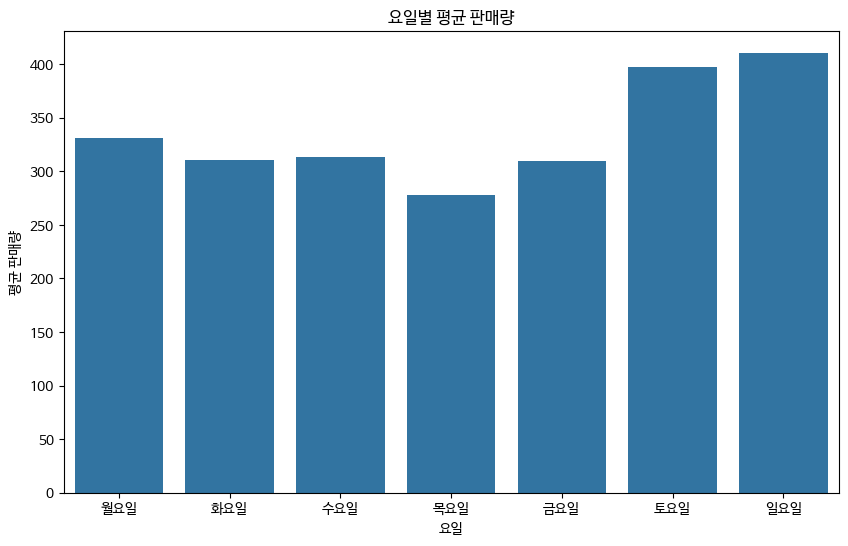

In [44]:
# 요일별 평균 판매량을 계산
day_sales = train_cleaned.groupby('dayofweek')['sales'].mean().reset_index()

# 요일 출력값 변경
day_sales['day_name'] = day_sales['dayofweek'].map({
    0:'월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'
})

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

#### 데이터 통합
* merge()
* inner join
* outer join: 없는 값도 NaN으로 결합 시킴
* left join: 왼쪽을 기준으로 놓고 오른쪽을 결합
* right join: 오른쪽을 기준으로 놓고 왼쪽을 결합

In [46]:
# 판매, 거래 데이터 통합
train_with_trans = pd.merge(
    train_cleaned, transactions,
    on = ['date', 'store_nbr'],
    how = 'left'
    )

# 매장 데이터 통합
train_with_store = pd.merge(
    train_with_trans, stores,
    on = 'store_nbr',
    how = 'left'
    )

# 원유 데이터 통합
train_final = pd.merge(
    train_with_store,
    oil_cleaned,
    on = 'date',
    how = 'left'
    )

print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())

최종 데이터셋 정보:
행 개수: 3000888, 열 개수: 19
['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end', 'transactions', 'city', 'state', 'type', 'cluster', 'dcoilwtico']
   id       date  store_nbr      family  sales  onpromotion  year  month  day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   dayofweek  weekend  is_month_start  is_month_end  transactions   city  \
0          1        0            True         False           NaN  Quito   
1          1        0            True         False           NaN  Quito   
2          1        0            True  